Copied example from Example-1 and made own processing to extract all numbers used in each item

-Shayne M. Plourde

## Punchline:

percentage of news with numbers that are true for kaggle_df: 

37.42458914083628 percent

Percentage of Kaggle that uses numbers: 

0.1070649026682703

percentage of news with numbers in title that are true for liar_df: 

55.13203786746388 percent

Percentage of Liar that uses numbers: 

0.3919921875


### The difference in number use for the Kaggle DF was significantly different from true to false, but the overall useage of numbers was too low to make meaningful predictions from.

# Read in datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Read in LIAR dataset columns 1 and 2 only:
liar_df = pd.read_csv('../Datasets/liar_dataset/train.tsv', sep='\t',header=None, usecols = [1,2], names=["Label", "Statement"])
liar_df['Truth'] = liar_df.Label.map({
    'pants-fire': 0,
    'false': 0,
    'mostly-false': 0,
    'half-true': 0,
    'barely-true': 1,
    'mostly-true': 1,
    'true': 1
})


In [3]:

# Read in Kaggle titles only. The dataframe df_kaggle has two columns: article titles, and (true/false).
kaggle_df_true = pd.read_csv('../Datasets/kaggle/True.csv', usecols = [0])
kaggle_df_fake = pd.read_csv('../Datasets/kaggle/Fake.csv', usecols = [0])
kaggle_df_true['Truth'] = 1
kaggle_df_fake['Truth'] = 0
kaggle_df = pd.concat([kaggle_df_true, kaggle_df_fake], ignore_index=True, sort=False)

In [4]:
liar_df['Numbs'] = liar_df.Statement.str.findall(r'(\d+(?:\.\d+)?)')
liar_df['UsesNumbs'] = 0
liar_df.loc[liar_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
liar_df.sample(5)

,Label,Statement,Truth,Numbs,UsesNumbs
6486,half-true,The health care reform law offset[s] 6 years o...,0,"[6, 10]",1
1570,half-true,"In South Carolina, women earn 76 cents on the ...",0,[76],1
10087,barely-true,"Keystone XL allows Canada to pump their oil, s...",1,[],0
6861,half-true,"Say in November 2010, voters overwhelmingly su...",0,[2010],1
1707,mostly-true,New Jersey has had seven credit downgrades sin...,1,[],0


In [6]:
kaggle_df['Numbs'] = kaggle_df.title.str.findall(r'(\d+(?:\.\d+)?)')
kaggle_df['UsesNumbs'] = 0
kaggle_df.loc[kaggle_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
kaggle_df.head(5)

,title,Truth,Numbs,UsesNumbs
0,"As U.S. budget fight looms, Republicans flip t...",1,[],0
1,U.S. military to accept transgender recruits o...,1,[],0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,[],0
3,FBI Russia probe helped by Australian diplomat...,1,[],0
4,Trump wants Postal Service to charge 'much mor...,1,[],0


In [12]:
kaggle_df.to_csv('../Datasets/kaggle/auxiliary/Use of numbers.csv', columns=['title','Truth', 'UsesNumbs'])

In [13]:
print('Percentage of Liar that uses numbers: ')
print(liar_df['UsesNumbs'].mean())

Percentage of Liar that uses numbers: 
0.3919921875


Label
barely-true    0.374849
false          0.319298
half-true      0.438978
mostly-true    0.463303
pants-fire     0.281287
true           0.408115
Name: UsesNumbs, dtype: float64

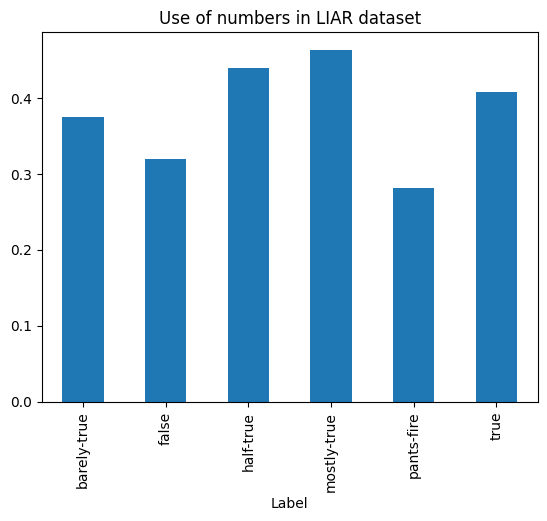

In [8]:
#count usesNumbs for each label AND PLOT
liar_df.groupby('Label')['UsesNumbs'].mean().plot(kind='bar')
#TITLE use of numbers
plt.title('Percentage of each category that usues numbers')
liar_df.groupby('Label')['UsesNumbs'].mean()

In [12]:
print('Percentage of Kaggle that uses numbers: ')
print(kaggle_df['UsesNumbs'].mean())

Percentage of Kaggle that uses numbers: 
0.1070649026682703


Truth
0    0.128104
1    0.083999
Name: UsesNumbs, dtype: float64

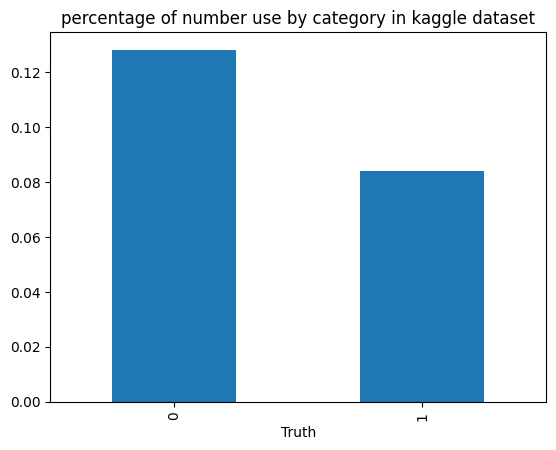

In [10]:
kaggle_df.groupby('Truth')['UsesNumbs'].mean().plot(kind='bar')
#TITLE use of numbers
plt.title('percentage of number use by category in kaggle dataset')
kaggle_df.groupby('Truth')['UsesNumbs'].mean()

In [8]:
#count of numbers in all lists in Numbs column for liar_df for Truth
print('percentage of news with numbers in title that are true for liar_df: ')
print(100*liar_df[liar_df['Truth'] == 1]['UsesNumbs'].sum() / liar_df['UsesNumbs'].sum(), 'percent')


percentage of news with numbers in title that are true for liar_df: 
55.13203786746388 percent


In [9]:
print('percentage of news with numbers that are true  in title for kaggle_df: ')
print(100*kaggle_df[kaggle_df['Truth'] == 1]['UsesNumbs'].sum() / kaggle_df['UsesNumbs'].sum(), 'percent')

percentage of news with numbers that are true  in title for kaggle_df: 
37.42458914083628 percent
